# Predict Heart Disease Using Machine Learning

This notebook looks into using various Python - based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medicasl attributes

We're going to take the following approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition 

In a statement
> Given clinical parameters about a patient can we predict whether or not they have a heart disease?

## Data


This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).




> There is a version available in kaggle :https://www.kaggle.com/ronitf/heart-disease-uci
> The original dataset came from the Cleveland Data from the UCI Machine Learning Repository :https://archive.ics.uci.edu/ml/datasets/heart+disease


## Evaluation:

> If we can reach 95% accuracy at predicting whether a patient has heart disease during the proof of concept , we will pursue the project


## Features:

>This is where you get different information about each of the feature in your data

**Create a Data Dictionary**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Evaluation Metrics and Model Selection Parameters
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , plot_confusion_matrix , plot_roc_curve
from sklearn.metrics import recall_score , precision_score , f1_score
from sklearn.model_selection import train_test_split , cross_val_score , KFold


## Load Data

In [249]:
df = pd.read_csv('heart-disease.csv')

In [250]:
df.shape
#The data has 303 rows and 14 features (including target column)

(303, 14)

In [251]:
df.head()
#check first five rows of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [252]:
df.tail()
#check last 5 rows of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [253]:
#Check the Data For Missing Values 
df.isnull().sum()
#Our Data has no missing values 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [254]:
#Check Datatype of our data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [255]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


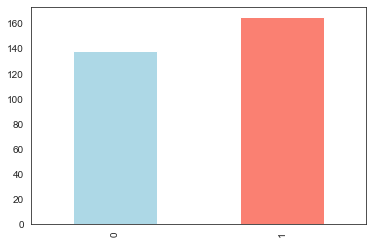

In [256]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'])
plt.show()

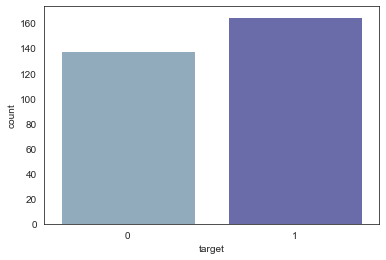

In [257]:
sns.countplot('target',data=df)
plt.show()
#There are different ways to visualize the same barplot

In [258]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [259]:
num_data = df.iloc[:,[0,3,4,7,9]]
num_data

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


Skewness of age: -0.2024633654856539
Kurtosis of age: -0.5421671409908408


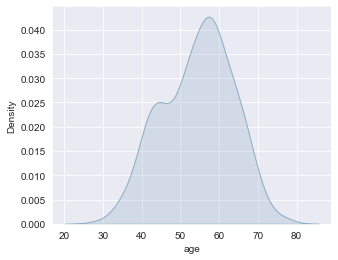

Skewness of trestbps: 0.7137684379181465
Kurtosis of trestbps: 0.9290540528369715


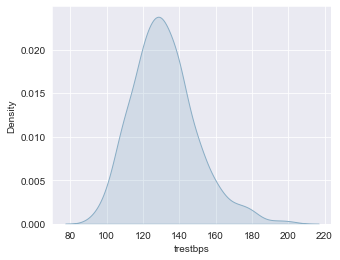

Skewness of chol: 1.1434008206693387
Kurtosis of chol: 4.505423167753712


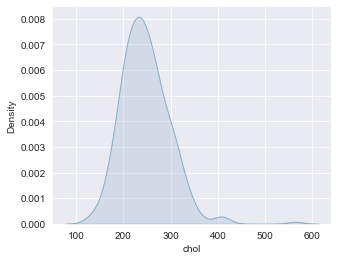

Skewness of thalach: -0.5374096526832253
Kurtosis of thalach: -0.06196993057611566


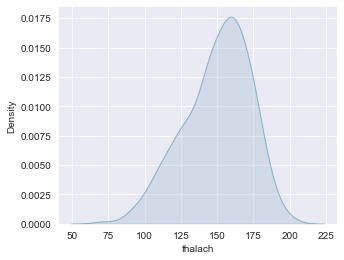

Skewness of oldpeak: 1.269719930601997
Kurtosis of oldpeak: 1.5758130733382507


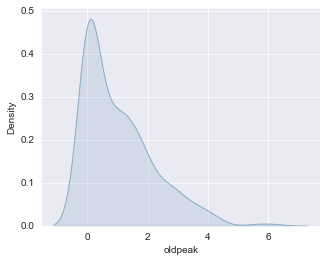

In [260]:
#Build Kernel Density Estimation Plots for the numerical data with Skewness and Kurtosis Values
sns.set_style('darkgrid')
sns.set_palette('twilight')

for i in num_data.columns:
    plt.figure(figsize=(5,4))
    sns.kdeplot(num_data[i],fill=True)
    print(f'Skewness of {i}: {num_data[i].skew()}')
    print(f'Kurtosis of {i}: {num_data[i].kurt()}')
    plt.show()

# Heart Disease Frequency according to Sex

In [261]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

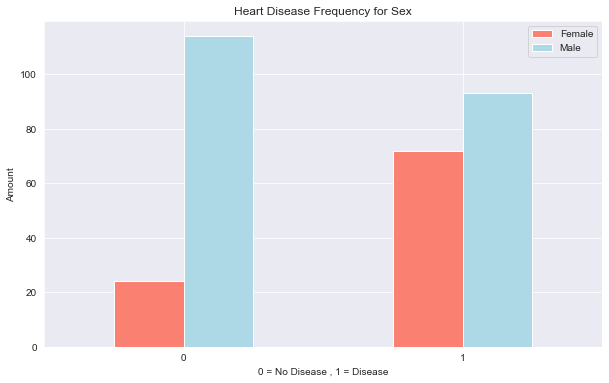

In [262]:
table = pd.crosstab(df.target , df.sex)

table.plot(kind='bar', color = ['salmon','lightblue'],figsize=(10,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease , 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)
plt.show()

## Age Versus Max Heart Rate for Heart Disease


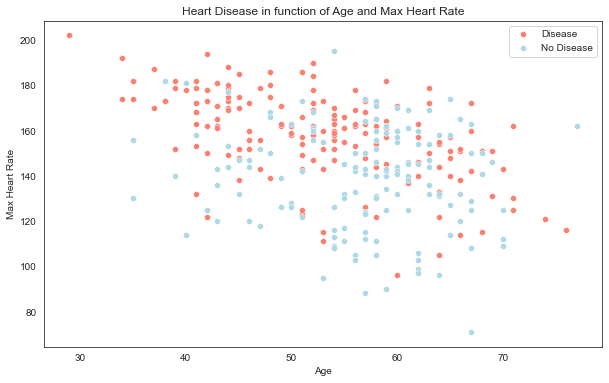

In [263]:
sns.set_style('white')
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='thalach' , data = df[df.target==1] , color='salmon')
sns.scatterplot(x='age',y='thalach' , data = df[df.target==0] , color='lightblue')
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])
plt.show()

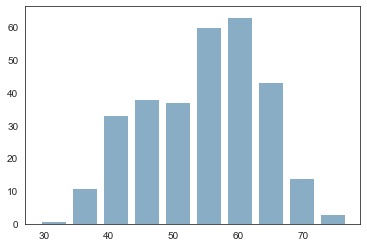

In [264]:
#Check the distribution of Age column

plt.hist(df['age'],bins=10,rwidth=0.8);


### Heart Disease Frequency per Chest Pain Type

>Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1. = typical angina
2. = atypical angina
3. = non — anginal pain
4. = asymptotic

In [265]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


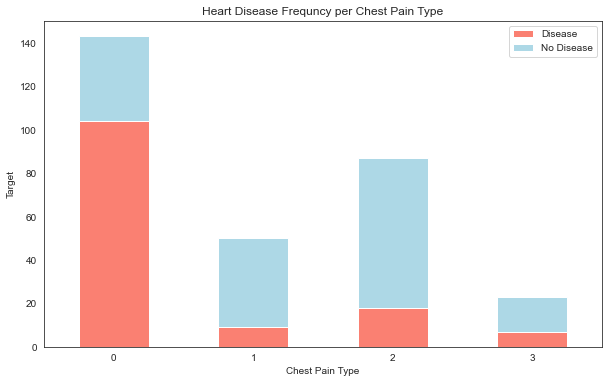

In [266]:
pd.crosstab(df.cp , df.target).plot(kind='bar',stacked=True , figsize=(10,6) , color=['salmon','lightblue']);
plt.title('Heart Disease Frequncy per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Target')
plt.legend(['Disease','No Disease'])
plt.xticks(rotation=0)
plt.show()

In [267]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


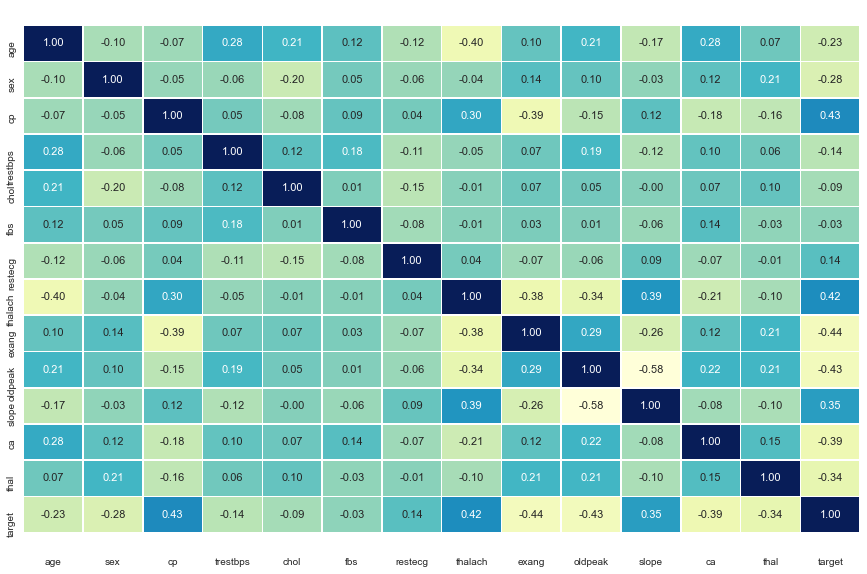

In [268]:
#Heatmap to check correlation of features
fig , ax = plt.subplots(figsize=(15,10))
corrmat = df.corr()
ax = sns.heatmap(corrmat , annot=True , annot_kws={'size':11},linewidths=0.6 ,fmt = '.2f', cmap = 'YlGnBu' , cbar=False)
bottom , top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [269]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Modelling

In [270]:
X = df.drop('target',1)
Y = df['target']

In [271]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [324]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [326]:
#Standard Scaling our input variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = pd.DataFrame(sc.fit_transform(X) , columns=X.columns)

In [332]:
np.random.seed(42)
xtrain , xtest , ytrain , ytest = train_test_split(X_sc , Y , test_size=0.2 )

# This was a proof concept
# Let us Try

In [333]:
models = {'Logistic Regression':LogisticRegression(),
         "K Nearest Neighbours":KNeighborsClassifier(),
         'Decision Tree':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models , xtrain , xtest , ytrain , ytest):
    '''
    Fits and Evaluates Given Machine Learning Models based on their Accuracy Scores
    models = dict of different Scikit Learn Machine Learning Models
    xtrain = training data (no labels)
    xtest = testing data (no labels)
    ytrain = training labels
    ytest = testing labels
    '''
    np.random.seed(42)
    
    model_scores = {}
    
    for name , model in models.items():
        model.fit(xtrain , ytrain)
        model_scores[name] = model.score(xtest , ytest)
    return model_scores
        

In [334]:
scores = fit_and_score(models , xtrain ,xtest , ytrain , ytest)

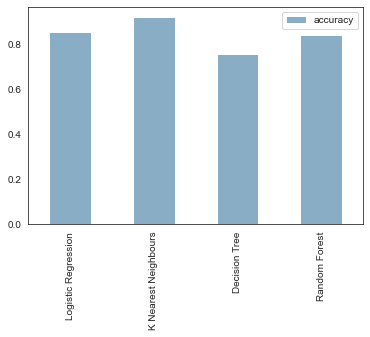

In [335]:
models_compare = pd.DataFrame(scores , index=['accuracy'])
models_compare.T.plot(kind='bar')
plt.xticks(rotation=90);

In [336]:
models_compare

,Logistic Regression,K Nearest Neighbours,Decision Tree,Random Forest
accuracy,0.852459,0.918033,0.754098,0.836066


* Let us look at the following
1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Cross Validation
5. Precision
6. Recall
7. f1-score
8. Classification Report
9. ROC Curve
10. Area Under the Curve (AUC)

## Hyperparameter Tuning

## Logistic Regression

In [437]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [438]:
LR = LogisticRegression()
LR.fit(xtrain,ytrain)


ypred_train = LR.predict(xtrain)
ypred_test = LR.predict(xtest)

LR.score(xtest , ytest)

0.8852459016393442

In [439]:
print(classification_report(ytrain , ypred_train))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       109
           1       0.84      0.92      0.88       133

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242



In [440]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



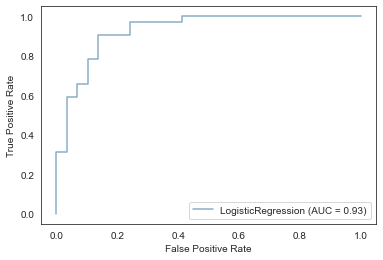

In [441]:
plot_roc_curve(LR , xtest , ytest);

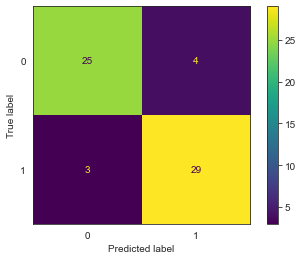

In [442]:
plot_confusion_matrix(LR , xtest , ytest);

In [443]:
#Hyperparameter Tuning for our Model using RandomizedSearchCV
params = {'C':np.logspace(-4,4,20),
         'solver':['liblinear']}
LR_grid = RandomizedSearchCV(LR , params , cv=5  , n_iter=20 , verbose=True)
LR_grid.fit(xtrain , ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [444]:
LR_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [445]:
LR_grid.score(xtest , ytest)

0.8852459016393442

In [446]:
#Let us redefine the model again
LR = LogisticRegression(C = 0.233 , solver='liblinear')
LR.fit(xtrain , ytrain)

ypred_test = LR.predict(xtest)

In [447]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [450]:
#Cross Validate our Model for accuracy ,  precision , recall and F1-score .
#We will use Kfold Cross Validation to ensure proper Shuffling

In [451]:
kf
#predefined

KFold(n_splits=5, random_state=0, shuffle=True)

In [460]:
score = cross_val_score(LR , X , Y , cv=kf , scoring = 'accuracy')
bias_acc = np.mean(score)
variance_acc = np.std(score , ddof=1)
print(bias_acc , variance_acc)

0.8318032786885248 0.03681616684610727


In [461]:
score = cross_val_score(LR , X , Y , cv=kf , scoring = 'precision')
bias_pr = np.mean(score)
variance_pr = np.std(score , ddof=1)
print(bias_pr , variance_pr)

0.805083350413336 0.050902145839011634


In [462]:
score = cross_val_score(LR , X , Y , cv=kf , scoring = 'recall')
bias_rec = np.mean(score)
variance_rec = np.std(score , ddof=1)
print(bias_rec , variance_rec)

0.9077732702276313 0.03468523080058225


In [463]:
score = cross_val_score(LR , X , Y , cv=kf , scoring = 'f1')
bias_f1 = np.mean(score)
variance_f1 = np.std(score , ddof=1)
print(bias_f1 , variance_f1)

0.8529861585782637 0.04121304502315753


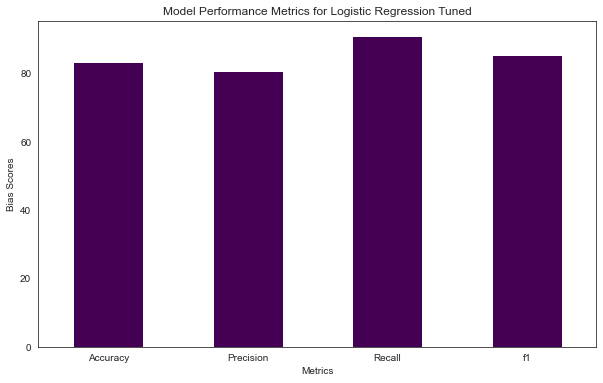

In [522]:
cv_metrics = pd.DataFrame({'Accuracy':bias_acc*100 
             ,'Precision':bias_pr*100,
             'Recall':bias_rec*100,
             'f1':bias_f1*100},index=['Metrics'])
cv_metrics.T.plot(kind='bar' , cmap='viridis',legend=None,figsize=(10,6))
plt.grid()
plt.xlabel('Metrics')
plt.ylabel('Bias Scores')
plt.title('Model Performance Metrics for Logistic Regression Tuned')
plt.xticks(rotation=0)
plt.show()



## K Nearest Neighbours

In [480]:
#We will use StandardScaler to make sure the distance caslculations for the model are uniform

In [481]:
sc =StandardScaler()
X_sc = pd.DataFrame(sc.fit_transform(X) , columns = X.columns)


In [482]:
#Split the data
xtrain , xtest , ytrain , ytest = train_test_split(X_sc , Y , test_size=0.2 , random_state=42)

In [483]:
#Define Model
KNN = KNeighborsClassifier()
KNN.fit(xtrain , ytrain)

ypred_test = KNN.predict(xtest)

In [484]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [485]:
KNN.score(xtest , ytest)
#Looks like the model is overfitting 

0.9180327868852459

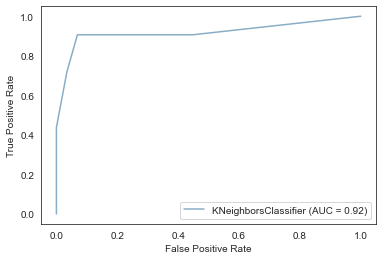

In [487]:
plot_roc_curve(KNN,xtest , ytest);

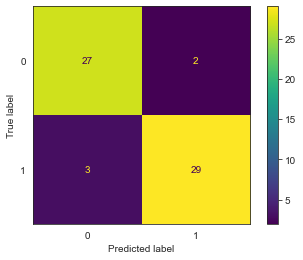

In [489]:
plot_confusion_matrix(KNN , xtest , ytest);

In [490]:
#Let us tune the model using RandomizedSearchCV

In [492]:
params = {'n_neighbors':np.arange(1,102),
         'weights':['uniform','distance'],
         'p':[0,1,2]}
knn_grid = RandomizedSearchCV(KNN , params , cv=5 , n_iter=20 , verbose=True )
knn_grid.fit(xtrain , ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
                                        'p': [0, 1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [494]:
knn_grid.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 18}

In [496]:
#Let us also try gridsearchCV

params = {'n_neighbors':np.arange(1,102),
         'weights':['uniform','distance'],
         'p':[0,1,2]}
knn_grid = GridSearchCV(KNN , params , cv=kf , verbose=True )
knn_grid.fit(xtrain , ytrain)

Fitting 5 folds for each of 606 candidates, totalling 3030 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3030 out of 3030 | elapsed:   20.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
                         'p': [0, 1, 2], 'weights': ['uniform', 'distance']},
             verbose=True)

In [499]:
print(knn_grid.score(xtest , ytest))
print(knn_grid.best_params_)

#RandomizedSearchCV gives better results but the model may be overfitting.
#We will go with Grid Search Hyperparameters

0.8852459016393442
{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [515]:
KNN_tuned = KNeighborsClassifier(n_neighbors= 8 , p=1 , weights='distance')
KNN_tuned.fit(xtrain , ytrain)

KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

In [516]:
KNN_tuned.score(xtest , ytest)
#decent accuracy

0.8852459016393442

In [517]:
ypred_test = KNN_tuned.predict(xtest)

In [518]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



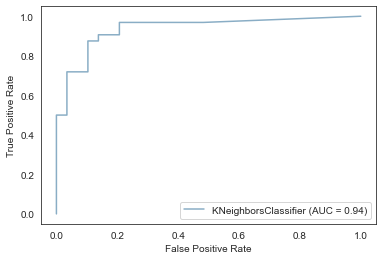

In [519]:
plot_roc_curve(KNN_tuned , xtest , ytest);

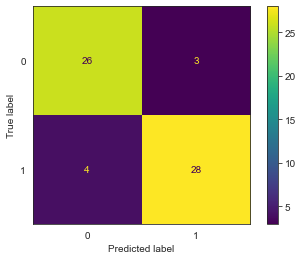

In [520]:
plot_confusion_matrix(KNN_tuned , xtest ,ytest);

In [521]:
#Let us Perform Cross Validation for Different Metrics

In [560]:
score = cross_val_score(KNN_tuned , X_sc , Y , cv=kf , scoring = 'accuracy')
bias_acc = np.mean(score)
variance_acc = np.std(score , ddof=1)
print(bias_acc , variance_acc)

0.8319125683060109 0.0530682406695057


In [561]:
score = cross_val_score(KNN_tuned , X_sc , Y , cv=kf , scoring = 'precision')
bias_pr = np.mean(score)
variance_pr = np.std(score , ddof=1)
print(bias_pr , variance_pr)

0.8163923538923538 0.07971553779961271


In [562]:
score = cross_val_score(KNN_tuned , X_sc , Y , cv=kf , scoring = 'recall')
bias_rec = np.mean(score)
variance_rec = np.std(score , ddof=1)
print(bias_rec , variance_rec)

0.8892111787243632 0.025037591926215085


In [563]:
score = cross_val_score(KNN_tuned , X_sc , Y , cv=kf , scoring = 'f1')
bias_f1 = np.mean(score)
variance_f1 = np.std(score , ddof=1)
print(bias_f1 , variance_f1)

0.8502359766539683 0.053959449052227305


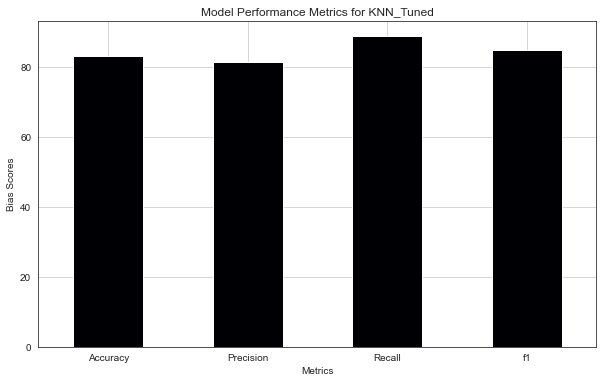

In [567]:

cv_metrics = pd.DataFrame({'Accuracy':bias_acc*100 
             ,'Precision':bias_pr*100,
             'Recall':bias_rec*100,
             'f1':bias_f1*100},index=['Metrics'])
cv_metrics.T.plot(kind='bar' , cmap='magma',legend=None,figsize=(10,6))
plt.grid()
plt.xlabel('Metrics')
plt.ylabel('Bias Scores')
plt.title('Model Performance Metrics for KNN_Tuned')
plt.xticks(rotation=0)
plt.show()



# Decision Tree 

In [591]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [592]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(xtrain , ytrain)

ypred_test = DT.predict(xtest)

In [593]:
DT.score(xtest , ytest)
#Low Accuracy

0.7540983606557377

In [594]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



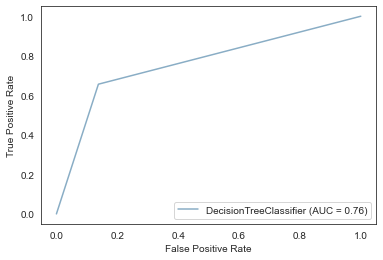

In [595]:
plot_roc_curve(DT , xtest , ytest);

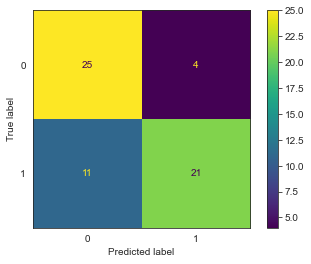

In [596]:
plot_confusion_matrix(DT , xtest , ytest);

In [597]:
#Let us Tune Our Model

In [598]:
params = {'max_depth':np.arange(1,12),
         'criterion':['gini','entropy'],
         'min_samples_leaf':np.arange(1,20,2),
         'min_samples_split':np.arange(2,20,2)}
grid = GridSearchCV(DT , params , cv=kf , scoring='accuracy')
grid.fit(xtrain , ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
             scoring='accuracy')

In [599]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [600]:
grid.score(xtest , ytest)
#Accuracy has increased - still less than knn and logistic regression

0.8032786885245902

In [601]:
DT_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                 min_samples_leaf=1 , min_samples_split=8 , random_state=42)
DT_tuned.fit(xtrain , ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=8,
                       random_state=42)

In [602]:
ypred_test = DT_tuned.predict(xtest)

In [603]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



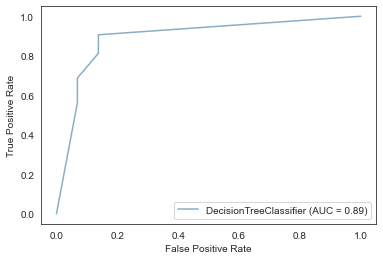

In [604]:
plot_roc_curve(DT_tuned , xtest ,  ytest);

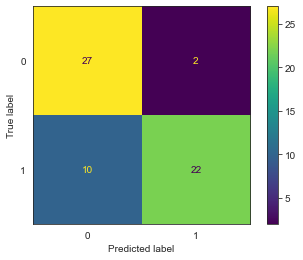

In [605]:
plot_confusion_matrix(DT_tuned , xtest , ytest);

In [606]:
#Let us Perform Cross Validation for Different Metrics

In [607]:
score = cross_val_score(DT_tuned , X , Y , cv=kf , scoring = 'accuracy')
bias_acc = np.mean(score)
variance_acc = np.std(score , ddof=1)
print(bias_acc , variance_acc)

0.7558469945355191 0.04031077947326328


In [608]:
score = cross_val_score(DT_tuned , X , Y , cv=kf , scoring = 'precision')
bias_pr = np.mean(score)
variance_pr = np.std(score , ddof=1)
print(bias_pr , variance_pr)

0.7836214179074711 0.0807355499767459


In [609]:
score = cross_val_score(DT_tuned , X , Y , cv=kf , scoring = 'recall')
bias_rec = np.mean(score)
variance_rec = np.std(score , ddof=1)
print(bias_rec , variance_rec)

0.7613319810682894 0.04767849288645105


In [610]:
score = cross_val_score(DT_tuned , X , Y , cv=kf , scoring = 'f1')
bias_f1 = np.mean(score)
variance_f1 = np.std(score , ddof=1)
print(bias_f1 , variance_f1)

0.7702580517907716 0.05099258399079842


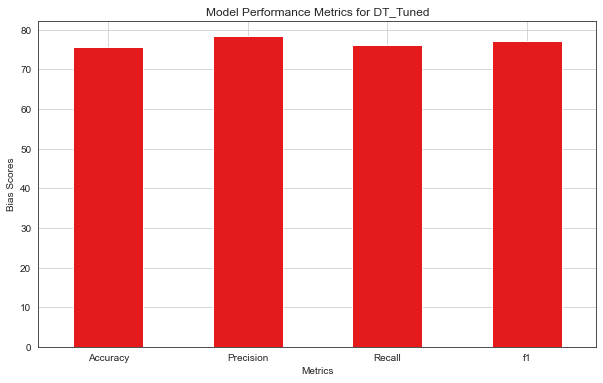

In [611]:
cv_metrics = pd.DataFrame({'Accuracy':bias_acc*100 
             ,'Precision':bias_pr*100,
             'Recall':bias_rec*100,
             'f1':bias_f1*100},index=['Metrics'])
cv_metrics.T.plot(kind='bar' , cmap='Set1',legend=None,figsize=(10,6))
plt.grid()
plt.xlabel('Metrics')
plt.ylabel('Bias Scores')
plt.title('Model Performance Metrics for DT_Tuned')
plt.xticks(rotation=0)
plt.show()

#Model Performance in Cross Validation is less than the previous two models

# Random Forest

In [612]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [613]:
RF = RandomForestClassifier(random_state=42)
RF.fit(xtrain,ytrain)
ypred_test = RF.predict(xtest)

In [614]:
RF.score(xtest , ytest)
#Good Accuracy

0.8360655737704918

In [615]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



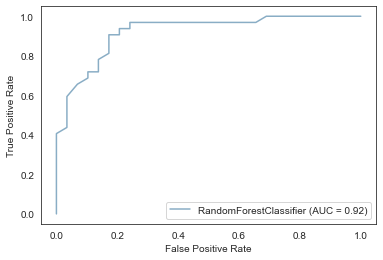

In [616]:
plot_roc_curve(RF , xtest , ytest);

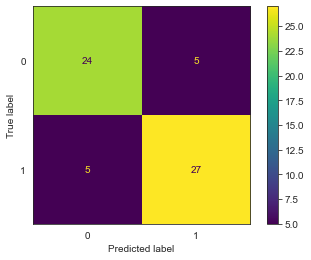

In [617]:
plot_confusion_matrix(RF , xtest , ytest);

In [618]:
#Let us Tune Our Model

In [622]:
params = {'max_depth':np.arange(1,12),
         'criterion':['gini','entropy'],
         'min_samples_leaf':np.arange(1,20,2),
         'min_samples_split':np.arange(2,20,2)}
grid = GridSearchCV(RF , params , cv=kf , scoring='accuracy')
grid.fit(xtrain , ytrain)

KeyboardInterrupt: 

In [621]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [620]:
grid.score(xtest , ytest)
#Accuracy has increased - still less than knn and logistic regression

AttributeError: 'GridSearchCV' object has no attribute 'scorer_'

In [623]:
RF_tuned = RandomForestClassifier(criterion='gini', max_depth=2,
                                 min_samples_leaf=15 , min_samples_split=2 , random_state=42)
RF_tuned.fit(xtrain , ytrain)

RandomForestClassifier(max_depth=2, min_samples_leaf=15, random_state=42)

In [624]:
ypred_test = RF_tuned.predict(xtest)

In [625]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



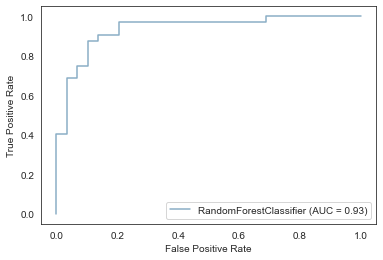

In [626]:
plot_roc_curve(RF_tuned , xtest ,  ytest);

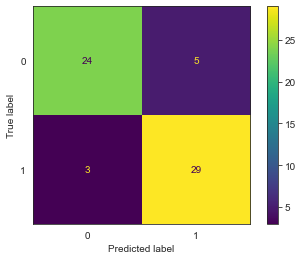

In [627]:
plot_confusion_matrix(RF_tuned , xtest , ytest);

In [637]:
#Let us also tune n_estimators for Random Forest using a customized grid search

rf_ve = []
for i in range(1,100):
    RF_tuned = RandomForestClassifier(n_estimators= i,criterion='gini', max_depth=2,
                                 min_samples_leaf=15 , min_samples_split=2 , random_state=42)
    score = cross_val_score(RF_tuned , X , Y , cv = kf , scoring = 'roc_auc')
    rf_ve.append(np.std(score , ddof=1))
    

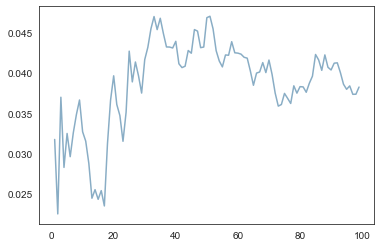

In [639]:
plt.plot(np.arange(1,100) , rf_ve);

In [654]:
rf_ve[12]


0.02447076193521857

In [655]:
RF_tuned = RandomForestClassifier(n_estimators= 12,criterion='gini', max_depth=2,
                                 min_samples_leaf=15 , min_samples_split=2 , random_state=42)

In [628]:
#Let us Perform Cross Validation for Different Metrics

In [656]:
score = cross_val_score(RF_tuned , X , Y , cv=kf , scoring = 'accuracy')
bias_acc = np.mean(score)
variance_acc = np.std(score , ddof=1)
print(bias_acc , variance_acc)

0.8085245901639343 0.03019243130025268


In [657]:
score = cross_val_score(RF_tuned , X , Y , cv=kf , scoring = 'precision')
bias_pr = np.mean(score)
variance_pr = np.std(score , ddof=1)
print(bias_pr , variance_pr)

0.7896719531583234 0.06263323159828296


In [658]:
score = cross_val_score(RF_tuned , X , Y , cv=kf , scoring = 'recall')
bias_rec = np.mean(score)
variance_rec = np.std(score , ddof=1)
print(bias_rec , variance_rec)

0.8861077304485013 0.045778963533098974


In [659]:
score = cross_val_score(RF_tuned , X , Y , cv=kf , scoring = 'f1')
bias_f1 = np.mean(score)
variance_f1 = np.std(score , ddof=1)
print(bias_f1 , variance_f1)

0.8330028656789221 0.03345595727973653


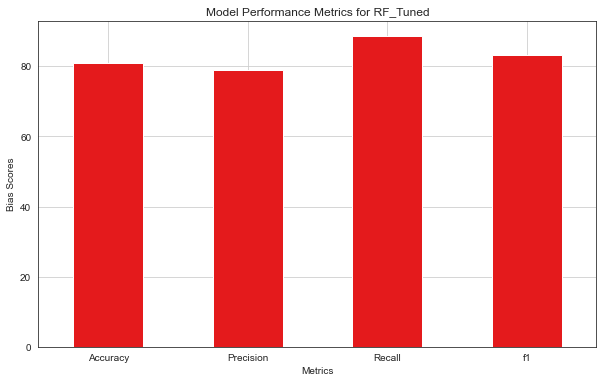

In [660]:
cv_metrics = pd.DataFrame({'Accuracy':bias_acc*100 
             ,'Precision':bias_pr*100,
             'Recall':bias_rec*100,
             'f1':bias_f1*100},index=['Metrics'])
cv_metrics.T.plot(kind='bar' , cmap='Set1',legend=None,figsize=(10,6))
plt.grid()
plt.xlabel('Metrics')
plt.ylabel('Bias Scores')
plt.title('Model Performance Metrics for RF_Tuned')
plt.xticks(rotation=0)
plt.show()

#Model Performance in Cross Validation is less than the previous two models

# Final Model Selection

In [661]:
#These are our final models.
#Let us visulaize model performance using cross val score and scoring with roc_auc and f1 scores.

LR = LogisticRegression(C = 0.233 , solver='liblinear')
KNN_tuned = KNeighborsClassifier(n_neighbors= 8 , p=1 , weights='distance')
DT_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                 min_samples_leaf=1 , min_samples_split=8 , random_state=42)
RF_tuned = RandomForestClassifier(n_estimators= 12,criterion='gini', max_depth=2,
                                 min_samples_leaf=15 , min_samples_split=2 , random_state=42)

In [684]:
models = (('Logistic Regression',LR),
         ('K Nearest Neighbors',KNN_tuned),
         ('Decision Tree',DT_tuned),
         ('Random Forest',RF_tuned))

cv_results1 = {}
cv_results2 = {}
for name , model in models:
    score1 = cross_val_score(model , X , Y , cv=kf , scoring= 'roc_auc')
    score2 = cross_val_score(model , X , Y , cv=kf , scoring= 'f1')
    cv_results1[name] = np.mean(score1)
    cv_results2[name] = np.mean(score2)
    

In [685]:
df1 = pd.DataFrame(cv_results1 , index = ['ROC_AUC Score'])
df2 = pd.DataFrame(cv_results2 , index = ['f1 Score'])
df3=pd.DataFrame()
df3 = df3.append(df1)
df3 = df3.append(df2)

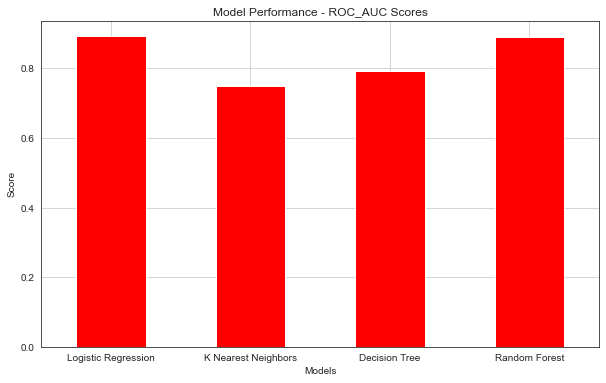

In [714]:
df3.T.iloc[:,0].plot(kind='bar' ,color='r' , figsize=(10,6));
plt.title('Model Performance - ROC_AUC Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid()
plt.show()

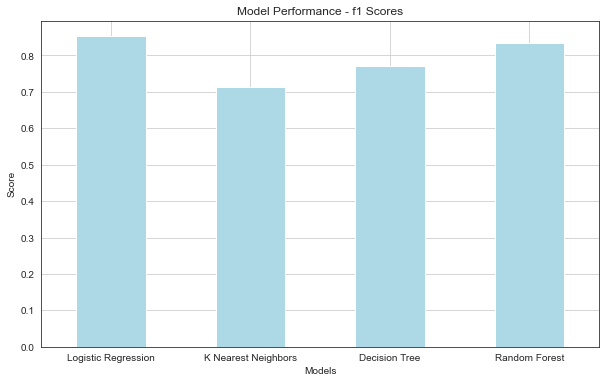

In [715]:
df3.T.iloc[:,1].plot(kind='bar' ,color='lightblue' , figsize=(10,6));
plt.title('Model Performance - f1 Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid()
plt.show()

## From the above insights we can conclude that Logistic Regression is performing better than the other three models in terms of ROC_AUC and f1 score.

# Let us Also Check the Feature Importance for that model

In [718]:
LR = LogisticRegression(C=0.233 , solver='liblinear')

In [719]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [720]:
LR.fit(xtrain , ytrain)
ypred_test = LR.predict(xtrain)

In [724]:
coef = pd.DataFrame(LR.coef_,columns = X.columns , index = ['Feature Coeffiecients'])

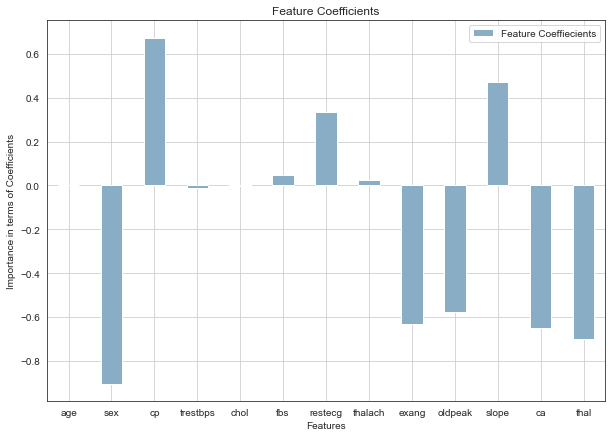

In [729]:
coef.T.plot(kind='bar',figsize=(10,7))
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Importance in terms of Coefficients')
plt.xticks(rotation=0)
plt.grid()
plt.show()


# We can See Features Like Sex , Types of Chest Pain , Exercise Induced Angima , Depression Induced by Exercise Relative to Rest , Slope of Peak and Number of Major Vessels with different values for THAL affecting the prediction in a major way . Person's Gender shows the highest importance in this following project.